In [1]:
import pandas as pd


In [2]:
test = pd.read_csv('E:\\python\\2.PROJECTS\\loan\\data\\test.csv')
train = pd.read_csv('E:\\python\\2.PROJECTS\\loan\\data\\train.csv')

In [3]:
train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
train.shape

(58645, 13)

In [5]:
train_df = train.copy()
test_df = test.copy()

In [6]:
train_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

In [7]:
cat_cols = train_df.select_dtypes(include=['object']).columns

In [8]:
cat_cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [9]:
for col in cat_cols:
  print(train_df[col].value_counts())

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64
loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64
loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64
cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64


In [10]:
for col in cat_cols:
  print(test_df[col].value_counts())

person_home_ownership
RENT        20280
MORTGAGE    16683
OWN          2056
OTHER          79
Name: count, dtype: int64
loan_intent
EDUCATION            8076
MEDICAL              7447
PERSONAL             6815
VENTURE              6632
DEBTCONSOLIDATION    5915
HOMEIMPROVEMENT      4213
Name: count, dtype: int64
loan_grade
A    14005
B    13604
C     7460
D     3269
E      637
F      105
G       18
Name: count, dtype: int64
cb_person_default_on_file
N    33227
Y     5871
Name: count, dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cols in cat_cols:
  train_df[cols] = le.fit_transform(train_df[cols])
  test_df[cols] = le.transform(test_df[cols])

In [12]:
train_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,3,0.0,1,1,6000,11.49,0.17,0,14,0
1,22,56000,2,6.0,3,2,4000,13.35,0.07,0,2,0
2,29,28800,2,8.0,4,0,6000,8.90,0.21,0,10,0
3,30,70000,3,14.0,5,1,12000,11.11,0.17,0,5,0
4,22,60000,3,2.0,3,0,6000,6.92,0.10,0,3,0


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

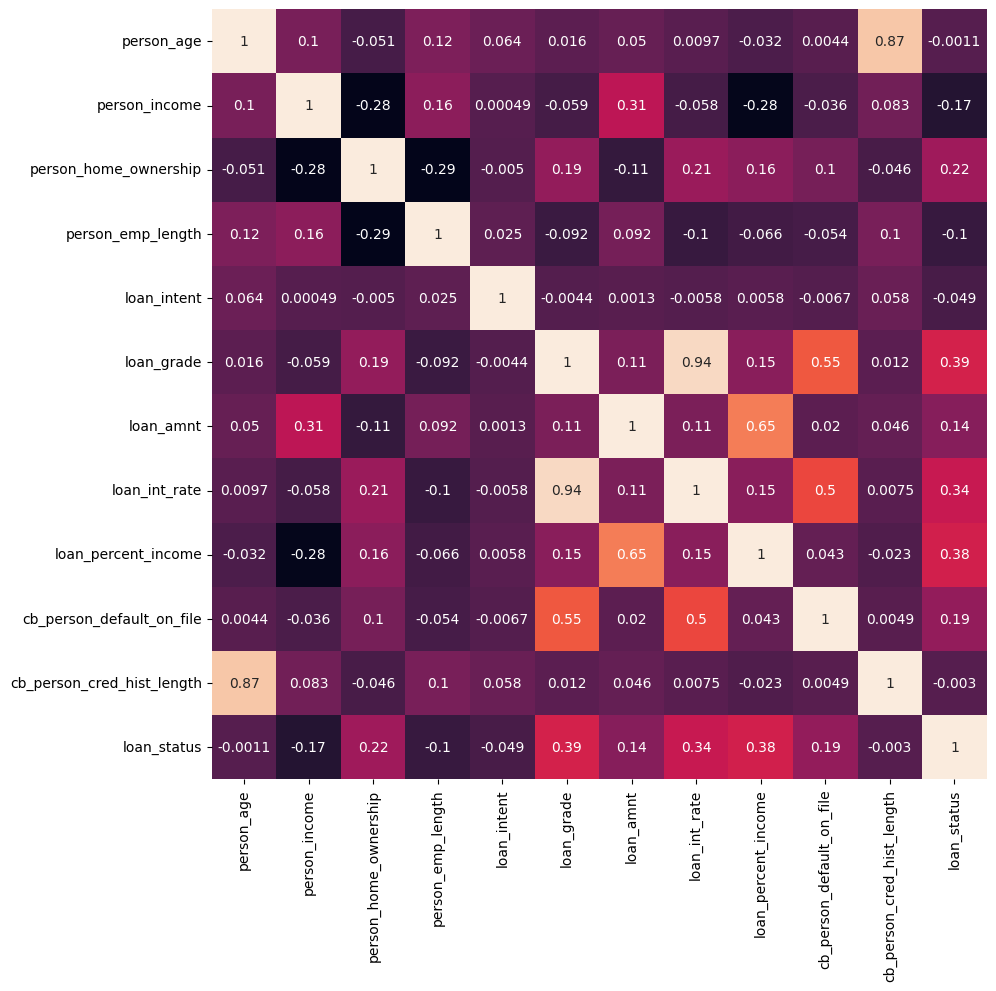

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.corr(),annot=True,cbar=False)

In [14]:
train_df.shape

(58645, 12)

In [15]:
X=train_df.drop('loan_status',axis=1)
y=train_df['loan_status']

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


In [17]:
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [18]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

In [18]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

scoring_metrics = ['accuracy', 'f1_macro', 'precision', 'recall', 'roc_auc']

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [19]:
rf = RandomForestClassifier(n_estimators= 900,min_samples_split= 5,min_samples_leaf= 5,max_features= 'sqrt',max_depth= 10)

In [ ]:
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring=scoring_metrics,
#                                 n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1,refit='accuracy')

In [20]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=900)

In [21]:
train_split_predictions = rf.predict(X_val)
test_df_predictions = rf.predict(test_df)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,classification_report,confusion_matrix

In [23]:
def score(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    # roc_auc = roc_auc_score(y_test, rf.predict_proba(test_df), multi_class='ovr')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    # print("ROC-AUC:", roc_auc)


In [24]:
cm = confusion_matrix(y_val, train_split_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using seaborn


Confusion Matrix:
[[9974   85]
 [ 532 1138]]


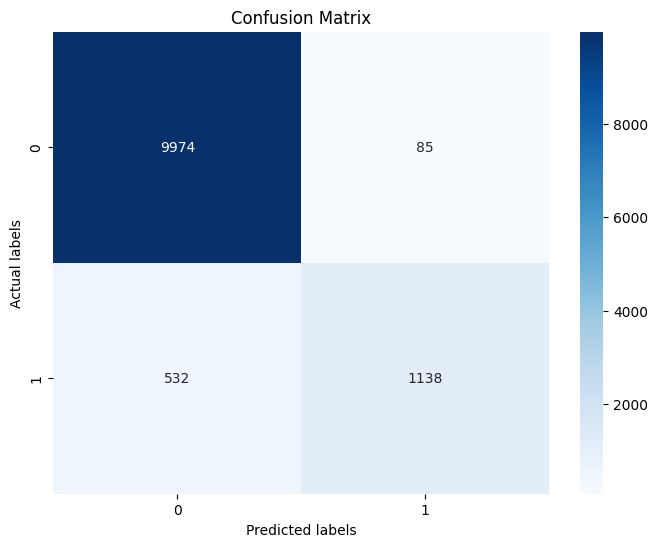

In [25]:

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title("Confusion Matrix")
plt.show()

# light gbm

In [26]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold

Here are the explanations for each hyperparameter in the lgb_params dictionary with longer descriptions:
1. objective
Description: Specifies the objective function to be optimized. This determines the loss function that LightGBM will use to evaluate the model's performance. For binary classification problems, the objective function is typically set to 'binary', which corresponds to the logistic loss function.
Value: 'binary' (binary classification)
Other options: 'regression', 'multiclass', 'cross_entropy', etc.
2. n_estimators
Description: The number of boosting iterations. This hyperparameter controls the number of decision trees that are combined to form the final model. Increasing the number of estimators can improve the model's performance but also increases the risk of overfitting.
Value: 3000
Tuning tip: Increase for better performance, but risk overfitting. A common approach is to start with a small value (e.g., 100) and gradually increase it until the model's performance plateaus.
3. metric
Description: The evaluation metric for the model. This hyperparameter specifies the metric that LightGBM will use to evaluate the model's performance during training. For binary classification problems, common metrics include 'binary_logloss' (binary log loss), 'auc' (area under the ROC curve), and 'accuracy'.
Value: 'binary_logloss' (binary log loss)
Other options: 'auc', 'l2', 'mean_squared_error', etc.
4. boosting_type
Description: The boosting type. This hyperparameter controls the boosting algorithm used by LightGBM. The most commonly used boosting types are 'gbdt' (Gradient Boosting Decision Tree) and 'dart' (Dropouts meet Multiple Additive Regression Trees).
Value: 'gbdt' (Gradient Boosting Decision Tree)
Other options: 'dart', 'goss', 'rf'
5. random_state
Description: The random seed for reproducibility. This hyperparameter ensures that the model's training process is reproducible by setting a fixed random seed.
Value: 42
6. learning_rate
Description: The learning rate for the model. This hyperparameter controls the step size of each boosting iteration. A smaller learning rate can lead to better convergence but may also increase training time.
Value: 0.0322942967545754
Tuning tip: Decrease for better convergence, but risk slower training. A common approach is to start with a small value (e.g., 0.01) and gradually increase it until the model's performance plateaus.
7. num_leaves
Description: The number of leaves in the decision tree. This hyperparameter controls the complexity of the decision tree. Increasing the number of leaves can improve the model's performance but also increases the risk of overfitting.
Value: 24
Tuning tip: Increase for better performance, but risk overfitting. A common approach is to start with a small value (e.g., 16) and gradually increase it until the model's performance plateaus.
8. max_depth
Description: The maximum depth of the decision tree. This hyperparameter controls the maximum depth of the decision tree. Increasing the maximum depth can improve the model's performance but also increases the risk of overfitting.
Value: 15
Tuning tip: Increase for better performance, but risk overfitting. A common approach is to start with a small value (e.g., 5) and gradually increase it until the model's performance plateaus.
9. min_data_in_leaf
Description: The minimum number of data points in a leaf. This hyperparameter controls the minimum number of data points required to be in a leaf node. Increasing this value can prevent overfitting but may also reduce the model's performance.
Value: 25
Tuning tip: Increase for better performance, but risk underfitting. A common approach is to start with a small value (e.g., 10) and gradually increase it until the model's performance plateaus.
10. feature_fraction
Description: The proportion of features to consider at each iteration. This hyperparameter controls the proportion of features that are randomly selected at each boosting iteration. Decreasing this value can prevent overfitting but may also reduce the model's performance.
Value: `0.623614408528
Meta AI has reached its word limit for this prompt. To continue, try a more specific prompt.

In [27]:
lgb_params = {
    'objective': 'binary',
    'n_estimators': 3000,
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'random_state': 42,
    'learning_rate': 0.0322942967545754,
    'num_leaves': 24,
    'max_depth': 15,
    'min_data_in_leaf': 25,
    'feature_fraction': 0.6236144085285287,
    'bagging_fraction': 0.9596685778433888,
    'bagging_freq': 3,
    'verbose': -1
}

different_params = {'bagging_fraction': 0.43904099091694154, 'boosting': 'gbdt', 'colsample_bytree': 0.9029709603801885, 'device': 'gpu', 'extra_trees': False, 'feature_fraction': 0.29828129570928497, 'learning_rate': 0.0722819048214123, 'max_depth': 11, 'metric': 'auc', 'min_child_samples': 770, 'min_split_gain': 0.24165420381221328, 'n_estimators': 2850, 'num_leaves': 1250, 'objective': 'binary', 'reg_alpha': 0.48503589153116633, 'reg_lambda': 0.012931105419962674, 'scale_pos_weight': 6, 'silent': True, 'subsample': 0.9, 'verbose': -1}

In [28]:
objective = ['binary']
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
metric = ['binary_logloss','auc','accuracy']
boosting_type = ['dart','gbdt']
learning_rate = [float(x) for x in np.linspace(0.01,1,50)]
num_leaves = [int(x) for x in np.linspace(10,100,2)]
max_depth = [int(x) for x in np.linspace(5,30,5)]
min_data_leaf = [int(x) for x in np.linspace(10,80,4)]
feature_fraction = [float(x) for x in np.linspace(0.1,1,10)]
bagging_fraction = [float(x) for x in np.linspace(0.1,1,10)]
bagging_freq = [int(x) for x in np.linspace(1,10,1)]

param_grid = {
    'objective': objective,
    'n_estimators': n_estimators,
    'metric': metric,
    'boosting_type': boosting_type,
    'learning_rate': learning_rate,
    'num_leaves': num_leaves,
    'max_depth': max_depth,
    'min_data_in_leaf': min_data_leaf,
    'feature_fraction': feature_fraction,
    'bagging_fraction': bagging_fraction,
    'bagging_freq': bagging_freq,
}

In [29]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()

In [ ]:
# Define RandomizedSearchCV
'''random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations to try
    # scoring='accuracy',  # Scoring metric
    cv=3,  # 3-fold cross-validation
    verbose= False,
    random_state=42,
    n_jobs= 1 # Utilize all available CPUs
)'''

In [ ]:
# random_search.fit(X_train, y_train)

In [ ]:
# print("Best Parameters:", random_search.best_params_)

In [30]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

In [31]:
lgbm_predictions = np.zeros(len(train_df))
lgbm_true_labels = np.zeros(len(train_df))
lgbm_test_predictions = np.zeros(len(test_df))

lgbm_model = LGBMClassifier(**lgb_params)
lgbm_model.fit(X_train, y_train,
                   eval_set=[(X_val, y_val)],
                   eval_metric='auc')


e:\python\2.PROJECTS\loan\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\python\2.PROJECTS\loan\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "e:\python\2.PROJECTS\loan\venv\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "e:\python\2.PROJECTS\loan\venv\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "e:\python\2.PROJECTS\loan\venv\lib\subprocess.py", line 1440, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


LGBMClassifier(bagging_fraction=0.9596685778433888, bagging_freq=3,
               feature_fraction=0.6236144085285287,
               learning_rate=0.0322942967545754, max_depth=15,
               metric='binary_logloss', min_data_in_leaf=25, n_estimators=3000,
               num_leaves=24, objective='binary', random_state=42, verbose=-1)

In [32]:

lgbm_fold_preds = lgbm_model.predict_proba(X_val)[:, 1]  #returns a 2D array with shape (n_samples, n_classes), this indexing extracts the second column ([:, 1]) of the array,
lgbm_fold_test_preds = lgbm_model.predict_proba(test_df)[:, 1]
lgbm_predictions[val_idx] = lgbm_fold_preds
lgbm_true_labels[val_idx] = y_val
lgbm_test_predictions += lgbm_fold_test_preds / 5 #n_splits=5
overall_metric_lgbm = roc_auc_score(lgbm_true_labels, lgbm_predictions)
print("Overall AUC (LGBMClassifier with StratifiedKFold):", overall_metric_lgbm)

Overall AUC (LGBMClassifier with StratifiedKFold): 0.9924393144382581


In [34]:
y_pred  = lgbm_model.predict(X_val)
# provide y_val for scores
def score(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    # roc_auc = roc_auc_score(y_test, rf.predict_proba(test_df), multi_class='ovr')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    # print("ROC-AUC:", roc_auc)

score(y_val,y_pred)

Accuracy: 0.9507204365248529
Precision: 0.9268578774676823
Recall: 0.8629021110775764
F1-score: 0.891084788350438


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

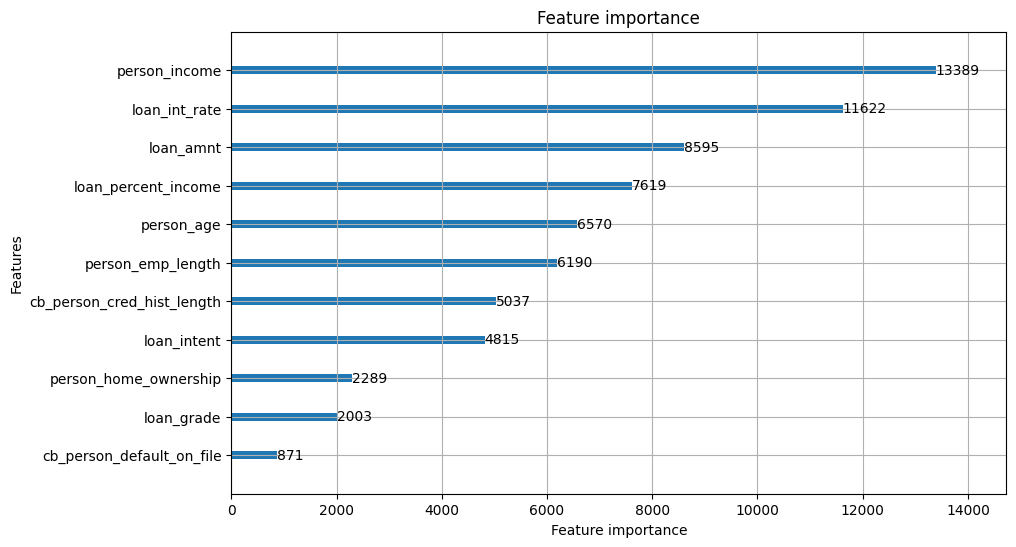

In [35]:
from lightgbm import plot_importance
plot_importance(lgbm_model,figsize=(10, 6))

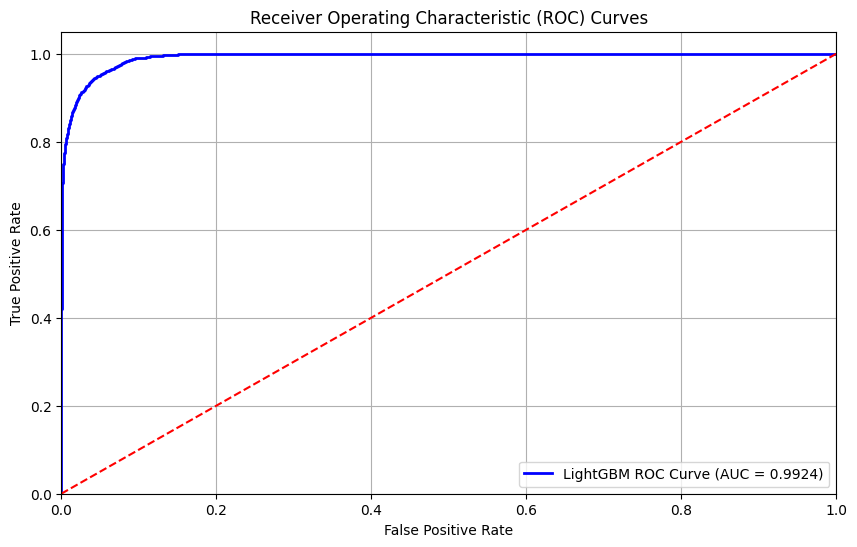

In [36]:
from sklearn.metrics import roc_curve, auc
fpr_lgbm, tpr_lgbm, _ = roc_curve(lgbm_true_labels, lgbm_predictions)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

# fpr_catboost, tpr_catboost, _ = roc_curve(catboost_true_labels, catboost_predictions)
# roc_auc_catboost = auc(fpr_catboost, tpr_catboost)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='blue', lw=2, label=f'LightGBM ROC Curve (AUC = {roc_auc_lgbm:.4f})')
# plt.plot(fpr_catboost, tpr_catboost, color='green', lw=2, label=f'CatBoost ROC Curve (AUC = {roc_auc_catboost:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# catbooost

In [19]:
from catboost import CatBoostClassifier,Pool,cv

In [20]:
train_df= train.copy()
test_df= test.copy()

In [21]:
train_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

In [22]:
train_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [23]:
X = train_df.drop('loan_status', axis=1)
y = train_df['loan_status']

In [24]:
print(X.shape)
print(y.shape)

(58645, 11)
(58645,)


In [25]:
from sklearn.model_selection import StratifiedKFold
n_splits = 5  # Number of folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    # Split the data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [26]:
print(train_df.shape)
print(test_df.shape)

(58645, 12)
(39098, 11)


In [27]:
print( X_train.shape, X_test.shape)

(46916, 11) (11729, 11)


In [28]:
print(y_train.shape, y_test.shape,)

(46916,) (11729,)


In [29]:
features = cat_cols.to_list()
features

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [30]:
train_pool = Pool(X_train,y_train,cat_features=features)
test_pool = Pool(X_test,y_test,cat_features=features)


In [31]:
def objective(trial):
    params={
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "depth": trial.suggest_int("depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-2, 10.0, log=True),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "random_strength": trial.suggest_float("random_strength", 1e-3, 10.0, log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "verbose": 0,
        "loss_function":trial.suggest_categorical("loss_function", ["Logloss"]), # Logistic loss for binary classification
        "grow_policy": trial.suggest_categorical("grow_policy", ["Lossguide"]), # for large dataset
        "eval_metric": trial.suggest_categorical("eval_metric", ["AUC"])    # efficient for imbalanced dataset
    }

    model = CatBoostClassifier(**params, random_seed=42)
    model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=50, verbose=False)

    # Predict and evaluate
    preds = model.predict(test_pool)
    accuracy = accuracy_score(test_pool.get_label(), preds)
    return accuracy  # Higher is better


#     catboost_params = {
#     'depth': 7,
#     'learning_rate': 0.19893301995319765,
#     'bagging_temperature': 0.7979373495258176,
#     'l2_leaf_reg': 5,
#     'loss_function': 'Logloss',
#     'iterations': 400,
#     'grow_policy': 'Lossguide',
#     'eval_metric': 'AUC',
# }


In [34]:
import optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2024-12-18 18:26:28,466] A new study created in memory with name: no-name-1006fd1e-7851-49c4-920f-2dd91018f04b


[I 2024-12-18 18:27:07,402] Trial 0 finished with value: 0.9532781993349817 and parameters: {'iterations': 207, 'depth': 7, 'learning_rate': 0.141956881199599, 'l2_leaf_reg': 8.835865339261716, 'border_count': 163, 'random_strength': 1.5344409490292241, 'bagging_temperature': 0.5529927141843112, 'loss_function': 'Logloss', 'grow_policy': 'Lossguide', 'eval_metric': 'AUC'}. Best is trial 0 with value: 0.9532781993349817.
[I 2024-12-18 18:27:46,500] Trial 1 finished with value: 0.9519993179299173 and parameters: {'iterations': 428, 'depth': 10, 'learning_rate': 0.1259624523836532, 'l2_leaf_reg': 0.7524133025174345, 'border_count': 70, 'random_strength': 0.39104787173948075, 'bagging_temperature': 0.07303788833328217, 'loss_function': 'Logloss', 'grow_policy': 'Lossguide', 'eval_metric': 'AUC'}. Best is trial 0 with value: 0.9532781993349817.
[I 2024-12-18 18:29:23,481] Trial 2 finished with value: 0.9532781993349817 and parameters: {'iterations': 506, 'depth': 10, 'learning_rate': 0.0659

In [35]:
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")

Best trial:
  Value: 0.9536192343763321
  Params: 


In [36]:
for key, value in trial.params.items():
    print(f"    {key}: {value}")

    iterations: 533
    depth: 8
    learning_rate: 0.04122611042070721
    l2_leaf_reg: 3.562136493550602
    border_count: 178
    random_strength: 0.006204084998060666
    bagging_temperature: 0.7414746060270054
    loss_function: Logloss
    grow_policy: Lossguide
    eval_metric: AUC


In [37]:
catboost_params ={
    'iterations': 533,
    'depth': 8,
    'learning_rate': 0.04122611042070721,
    'l2_leaf_reg': 3.562136493550602,
    'border_count': 178,
    'random_strength': 0.006204084998060666,
    'bagging_temperature': 0.7414746060270054,
    'loss_function': "Logloss",
    'grow_policy': "Lossguide",
    'eval_metric': "AUC"
    }

In [39]:
model = CatBoostClassifier(**catboost_params)
model.fit(train_pool)

0:	total: 404ms	remaining: 3m 34s
1:	total: 599ms	remaining: 2m 39s
2:	total: 839ms	remaining: 2m 28s
3:	total: 1.14s	remaining: 2m 30s
4:	total: 1.31s	remaining: 2m 18s
5:	total: 1.49s	remaining: 2m 11s
6:	total: 1.68s	remaining: 2m 5s
7:	total: 1.91s	remaining: 2m 5s
8:	total: 2.1s	remaining: 2m 2s
9:	total: 2.28s	remaining: 1m 59s
10:	total: 2.5s	remaining: 1m 58s
11:	total: 2.7s	remaining: 1m 57s
12:	total: 2.92s	remaining: 1m 56s
13:	total: 3.12s	remaining: 1m 55s
14:	total: 3.4s	remaining: 1m 57s
15:	total: 3.59s	remaining: 1m 56s
16:	total: 3.77s	remaining: 1m 54s
17:	total: 3.96s	remaining: 1m 53s
18:	total: 4.15s	remaining: 1m 52s
19:	total: 4.35s	remaining: 1m 51s
20:	total: 4.53s	remaining: 1m 50s
21:	total: 4.7s	remaining: 1m 49s
22:	total: 4.9s	remaining: 1m 48s
23:	total: 5.09s	remaining: 1m 47s
24:	total: 5.28s	remaining: 1m 47s
25:	total: 5.75s	remaining: 1m 52s
26:	total: 5.93s	remaining: 1m 51s
27:	total: 6.3s	remaining: 1m 53s
28:	total: 6.5s	remaining: 1m 52s
29:	to

In [40]:
y_test_pred = model.predict(X_test)

In [41]:
y_test_df_pred = model.predict(test_df)

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def score(y_test,y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    # roc_auc = roc_auc_score(y_test, rf.predict_proba(test_df), multi_class='ovr')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    # print("ROC-AUC:", roc_auc)

In [44]:
score(y_test ,y_test_pred)

Accuracy: 0.9531076818143064
Precision: 0.933107806073512
Recall: 0.8672902331334944
F1-score: 0.8962451953320365


In [45]:
roc_auc = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
roc_auc

0.8672902331334944

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

Confusion Matrix:
[[9931  128]
 [ 422 1248]]


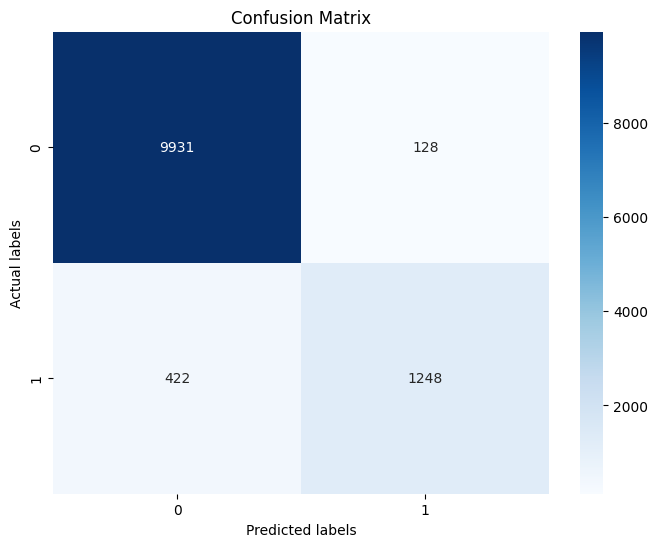

In [47]:
cm = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.title("Confusion Matrix")
plt.show()

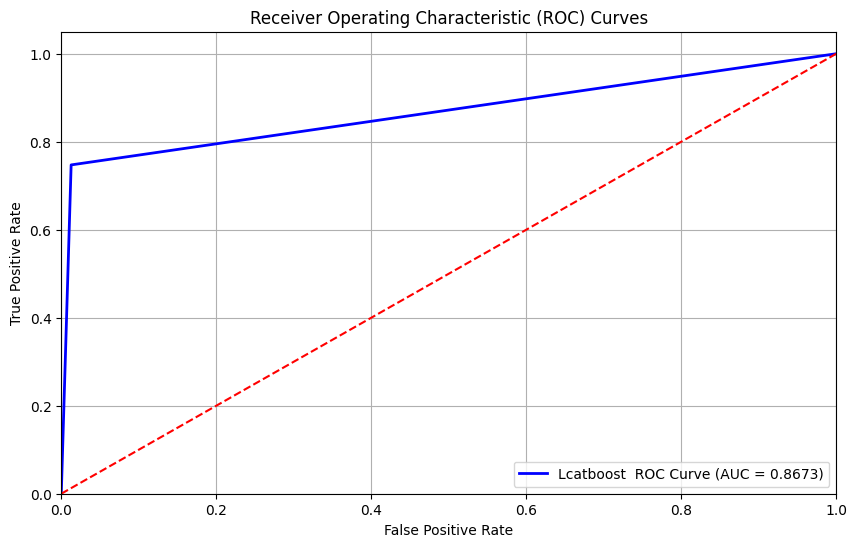

In [48]:
from sklearn.metrics import roc_curve, auc
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_test_pred)
cat_auc = auc(fpr_lgbm, tpr_lgbm)

# fpr_catboost, tpr_catboost, _ = roc_curve(catboost_true_labels, catboost_predictions)
# roc_auc_catboost = auc(fpr_catboost, tpr_catboost)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='blue', lw=2, label=f'Lcatboost  ROC Curve (AUC = {cat_auc:.4f})')
# plt.plot(fpr_catboost, tpr_catboost, color='green', lw=2, label=f'CatBoost ROC Curve (AUC = {roc_auc_catboost:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [49]:
scores = cv(params={
        'loss_function': 'Logloss',  # Specify the loss function
        'iterations': 100,
        'depth': 6,
        'learning_rate': 0.1,
        'eval_metric': 'Accuracy',
        'random_state': 42,
        'verbose': 100
    },
    pool=train_pool,
    fold_count=5,
    shuffle=True,
    verbose=100
)

Training on fold [0/5]
0:	learn: 0.9011510	test: 0.9035592	best: 0.9035592 (0)	total: 129ms	remaining: 12.8s
99:	learn: 0.9527070	test: 0.9520460	best: 0.9522592 (95)	total: 7.8s	remaining: 0us

bestTest = 0.9522591645
bestIteration = 95

Training on fold [1/5]
0:	learn: 0.9052034	test: 0.8958755	best: 0.8958755 (0)	total: 216ms	remaining: 21.4s
99:	learn: 0.9531346	test: 0.9525738	best: 0.9526804 (97)	total: 7.02s	remaining: 0us

bestTest = 0.9526803794
bestIteration = 97

Training on fold [2/5]
0:	learn: 0.9008339	test: 0.9046147	best: 0.9046147 (0)	total: 77.9ms	remaining: 7.72s
99:	learn: 0.9524685	test: 0.9536396	best: 0.9536396 (94)	total: 8.19s	remaining: 0us

bestTest = 0.9536395609
bestIteration = 94

Training on fold [3/5]
0:	learn: 0.9003011	test: 0.8987531	best: 0.8987531 (0)	total: 63.6ms	remaining: 6.3s
99:	learn: 0.9536674	test: 0.9493765	best: 0.9496963 (95)	total: 6.9s	remaining: 0us

bestTest = 0.9496962592
bestIteration = 95

Training on fold [4/5]
0:	learn: 0.893560

In [50]:
scores.mean()

iterations             49.500000
test-Accuracy-mean      0.942272
test-Accuracy-std       0.002128
train-Accuracy-mean     0.944063
train-Accuracy-std      0.000990
test-Logloss-mean       0.200661
test-Logloss-std        0.002326
train-Logloss-mean      0.196527
train-Logloss-std       0.001650
dtype: float64

In [51]:
import pickle
with open("CB_classifier.pkl", "wb") as f:
    pickle.dump(model, f)

# handling imbalanced dataset


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
b = np.bincount(y)
b_train = np.bincount(y_train)

array([50295,  8350], dtype=int64)

In [19]:
tot = len(y)
tot_train = len(y)

In [22]:
class_weights = {i: tot_train / (len(b_train) * b_train[i]) for i in range(len(b_train))}
class_weights

{0: 0.72876279948305, 1: 4.389595808383233}